#**Using Python libraries for Handling WaPOR Data**
#Notebook 4: Calculating and visualising statistics and timeseries for area of interest
In this Notebook we will show you how to calculate seasonal AETI and dekadal timeseries of AETI for different farms or group of farms.   
The steps are:
1. Install and load necessary Python Libraries to manage raster files
2. Load the seasonal WaPOR AETI file created in [Notebook 2 : Temporal data aggregation](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N02_Temporal_Aggregation.ipynb)
3. Calculate average seasonal AETI for each farm and aggregate results per tertiary unit
5. Compute and visualise time series of dekadal AETI per farm for one tertiary unit.
6. Exercises (needed for MOOC quiz)


**Data needed (same as for Notebook 02)**:

For the exercises of the [MOOC Python for geospatial analyses using WaPOR data](https://ocw.un-ihe.org/course/view.php?id=272) you can use the following data:

* Seasonal WaPOR AETI tiff file created in [Notebook 2 : Temporal data aggregation](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N02_Temporal_Aggregation.ipynb)

* For the farm level analyses we will be using the WH_Fields.geojson file located in the data folder of [WaPORMOOC](https://github.com/wateraccounting/WaPORMOOC)).

We will also be using the same WaPOR data as used for [Notebook 2 : Temporal data aggregation](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N02_Temporal_Aggregation.ipynb) for the temporal analyses:  
* **Area**: Wad Helal in the Gezira Irrigation Scheme (you can find the "Wad_Helal.geojson" file in the data folder of [WaPORMOOC](https://github.com/wateraccounting/WaPORMOOC)).

* **Type of Data**: AETI

* **Spatial resolution**: Level 3

* **Temporal resolution**: dekadal

* **Start date**: 2022-10-01

* **End date**: 2023-04-30



---



### **Step 1 Install and import required python libraries**

In [7]:
# Install required packages
%%capture
!pip install --upgrade xarray  --quiet
!pip install --upgrade geopandas --quiet
!pip install --upgrade rioxarray --quiet

In [23]:
# Import the required packages
from osgeo import gdal
import xarray as xr
import rioxarray as rio
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

### **N.B.**
>In this notebook we used additional python libraries called <font color='steelblue'>**`Xarray`**</font> and <font color='steelblue'>**`rioxarray`**</font>. <font color='steelblue'>**`Xarray`**</font> is a python library which simplifies working with labelled multi-dimension arrays such as stack of rasters and<font color='steelblue'>**`rioxarray`**</font> is an Xarray extension that allows reading and writing a wide variety of geospatial image formats compatible with Geographic Information Systems (GIS). Introducing these libraries is out of the scope of this Notebook, but for **[xarray](https://tutorial.xarray.dev/overview/xarray-in-45-min.html)** and **[rioxarray](https://corteva.github.io/rioxarray/html/getting_started/getting_started.html)** you can find good Notebooks that provide a good introduction about the libraries for a basic understanding.



---





---



### **Step 2 - Load the seasonal WaPOR AETI file**
We will now upload the Seasonal WaPOR AETI file you created  in [Notebook 2 : Temporal data aggregation](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N02_Temporal_Aggregation.ipynb). This file as a .tif extension.

Execute the command below, click the `Choose Files` button, navigate to where you have saved the .tif file in your local drive and select the file.

In [13]:
#To upload file.
from google.colab import files
uploaded = files.upload()

Saving npp_s1.tif to npp_s1.tif




---



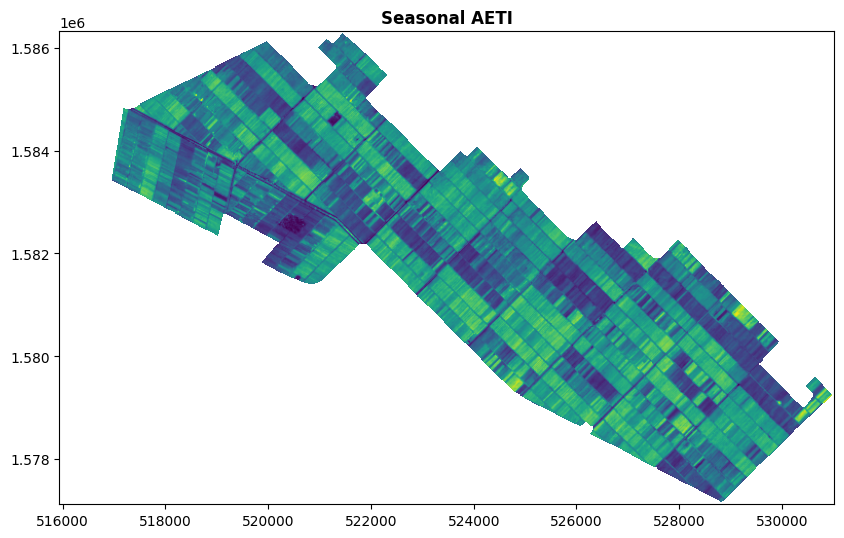

In [56]:
seasonal = '/content/npp_s1.tif'                            # Path to seasonal file
with rasterio.open(seasonal) as src:                        # Open the raster file
    fig, ax = plt.subplots(figsize=(10, 10))                # Create a matplotlib figure and axis object with a specified size
    show(src, ax=ax, title='Seasonal AETI')                 # Use rasterio's show function to display the raster data on the axes
    plt.show()                                              # Display the plot




---



## **Step 6 - Compute average AETI per plot for one field**

Upload and read the area of interest. In this case the WH_Field.geojson file that contains information about 214 individual fields within the Wad Helal irrigation block that cropped Wheat in the 2022/2023 winter season.

In [48]:
#To upload file.
from google.colab import files
uploaded = files.upload()

Saving WH_Fields.geojson to WH_Fields.geojson


In [50]:
## Read polygons of fields in the area of interest for wheat fields
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

aoi = r"/content/WH_Fields.geojson" ## give the correct path of the geojson file here
gdf = gpd.read_file(aoi)
gdf

,id,yield,layer,path,geometry
0,3201,3.31,BahiEddin11,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((518802.239 1582439.322, 518814..."
1,3202,3.10,BahiEddin11,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((518813.176 1582497.245, 518826..."
2,3203,2.32,BahiEddin11,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((518827.493 1582553.491, 518840..."
3,3204,3.30,BahiEddin11,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((518838.855 1582607.637, 518846..."
4,3205,3.32,BahiEddin11,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((518847.277 1582639.538, 518853..."
...,...,...,...,...,...
209,1220,3.17,Hegeiliga_Median,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((528152.674 1580025.052, 528174..."
210,1221,3.17,Hegeiliga_Median,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((528174.503 1580003.671, 528195..."
211,1222,1.98,Hegeiliga_Median,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((528069.161 1580109.373, 528153..."
212,1223,2.64,Hegeiliga_Median,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((528028.463 1580149.305, 528048..."


<Axes: >

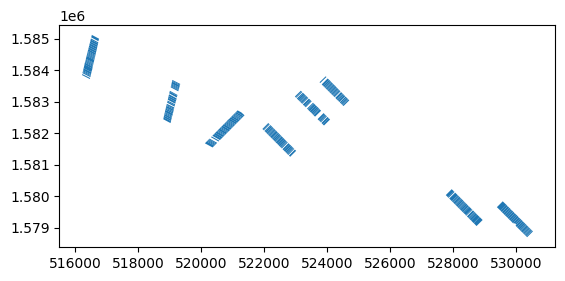

In [51]:
# Plotting the plots
gdf.plot()

As you can see from the above plot, we have information from 8 tertiary units with several fields within each tertiary unit (in the DataFrame, each tertiary unit has a different name in the 'layer' column.

You can get the name of the fields using the following code:

In [54]:
# get the name of the fields
np.unique(gdf['layer'])

array(['BahiEddin11', 'BahiEddin21', 'BahiEddin3', 'Eltukl10',
       'FakiMusa1', 'FakiMusa6', 'FakiMusa9', 'Hegeiliga_Median'],
      dtype=object)

We want to find all the fields within one tertiary unit. We will use the following code to find all fields within the **`'FakiMusa6'`** unit as an example:



In [ ]:
## Find all fields within one tertiary unit (FakiMusa6)
farms_Faki = gdf[gdf['layer']=='FakiMusa6']
farms_Faki


,id,yield,layer,path,geometry
136,2201,2.25,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((524055.126 1582470.685, 524096..."
137,2202,2.60,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523821.720 1582321.897, 524014..."
138,2203,1.98,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523974.387 1582548.666, 523996..."
139,2204,1.81,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523952.826 1582571.308, 523975..."
140,2205,2.38,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523932.536 1582591.013, 523952..."
141,2206,2.25,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523890.261 1582634.618, 523933..."
142,2207,1.69,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523768.945 1582749.492, 523812..."
143,2208,2.38,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523748.227 1582774.232, 523772..."
144,2209,2.64,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523726.667 1582797.294, 523748..."
145,2210,2.18,FakiMusa6,D:/WA+/FAO_phase2/Python_for_geospatial_OCW/Fi...,"MULTIPOLYGON (((523683.551 1582838.380, 523727..."


**Excercise 1** We have information about several fields within this tertiary unit. Can you find out how many fields within this tertiary unit are listed in this DataFrame? Note down this answer, you need it in the MOOC quiz!

HINT: check out **Exercise 3** of [Notebook 01 Introduction to Pandas and Geopandas](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N01_Intro_Pandas_and_Geopandas.ipynb)

In [ ]:
# Number of Polygons in FakiMusa6 field



## **Step 6 - Compute average AETI for all farms within FakiMusa6**

WHAT ARE WE DOING HERE? seasonal AETI or dekadal? Where is the seasonally calculated value loaded? what does this do? names are not clear etc
In the next

In [ ]:
# Iterate through the plots and use the plots polygons to clip the AETI dataarray

# creat empty lists to hold the values for each plot
AETI_per_plot = [] # to hold the AETI per plot
plot_id = [] # to hold ID of the plots
plot_area = [] # to hold the area of plots

for index, row in farms_Faki.iterrows(): # iteration through the farms_Faki dataframe rows
  shdf = farms_Faki.loc[[index]]

  if(not shdf.geometry.item().is_empty): # check if the polygon of the plot is not empty
      da = ds_season.rio.clip(shdf.geometry, farms_Faki.crs,
                              all_touched=False) #same option as QGIS zonal statistics
      # compute AETI of the polygon
      da = da.mean(dim=['latitude','longitude']).data

      AETI_per_plot.append(da) # add the AETI per plot to the AETI_per_plot list
      plot_id.append(shdf.id.values[0]) # add the ID of a plot to plot_id list
      plot_area.append(shdf.area.iloc[0]) # add area of the plot polygon to the plot_area list

# # round the numbers in AETI and area for each polygon
AETI_per_plot = [ np.around(i,2) for i in AETI_per_plot]
plot_area = [np.around(i,2) for i in plot_area]

A DataFrame can be created using the the lists we created in the above cell as follows:

In [ ]:
# create a Pandas DataFrame with the seasonal AETI, area and ID of each polygon
data={'Farm_ID':plot_id,'Farm_mean_AETI [mm/season]':AETI_per_plot,
        'Farm_area [m^2]':plot_area}
df = pd.DataFrame(data)
df = df.sort_values('Farm_ID',ascending=True)
df

,Farm_ID,Farm_mean_AETI [mm/season],Farm_area [m^2]
0,2201,614.08,15209.41
1,2202,694.19,15918.42
2,2203,635.68,7857.22
3,2204,628.16,8824.49
4,2205,630.22,6912.06
5,2206,516.11,16365.87
6,2207,631.60,16014.79
7,2208,677.22,8348.46
8,2209,677.26,8690.25
9,2210,629.31,15718.16



To calculate the min, max and mean of the seasonal AETI and Farm area for each farm we use the following Panda functions, which we introduced in [Notebook 01 Introduction to Pandas and Geopandas](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N01_Intro_Pandas_and_Geopandas.ipynb):
```python
    df.iloc[:,1:] # Selects the column of the dataframe starting from the second column
    .agg(['min', 'max', 'mean']) # aggregate function to calculate the min, max and mean of the selected dataframe columns
    .round() # function to round the values of the columns
    .astype(int) # to change the data type of the columns to integer

```

In [ ]:
# applying the above functions to get minimum, maximum and mean of the AETI and the area
mm = df.iloc[:,1:].agg(['min', 'max', 'mean']).round().astype(int)
mm

,Farm_mean_AETI [mm/season],Farm_area [m^2]
min,516,6912
max,737,16907
mean,658,10916




---



## 7 -  Saving the dataframes computed above to csv and download them to local folder:

In [ ]:
# for dataframe df
farm_name = farms_Faki.layer.iloc[0]
file_name1 = f'AETI_and_Area_per_plot_for_{farm_name}_field.csv'
df.to_csv(file_name1)

# for dataframe mm
file_name2 = f'Stat_for_{farm_name}_field.csv'
mm.to_csv(file_name2)

#download the two csv files
files.download(file_name1)
files.download(file_name2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



<div class="alert alert-success">

## **8 - EXERCISE**:

>Do the zonal statistics for tertiary unit **`'Eltukl10'`** and get the minimum, maximum and mean of the seasonal average AETI and the area of each farm.

>Note down the values (rounded to the integer values), you will need them for the MOOC quiz.


<details>
  <summary>Hints</summary>

>Select the field **`'Eltukl10'`** from the geodataframe (at the 13th cell) and run the last three cells.

</details>
    
</div>





---



## **9 - Bonus - decadal AETI time series**
In you want to get a timeseries of decadal AETI per plot, you can run the following three cells and as an exercise try to do the same for the tertiary unit **`'FakiMusa6'`**

### **Steps:**


1. Use the same tertiary unit as above (FakiMusa6) and the decadal AETI data
2. Iterate over the farms of the tertiary unit, clip the dataarray by each farm and compute the average AETI per farm
3. Save the result of each iteration in a dictionary (decadal_AETI)
4. Convert the dictionary to a dataframe
5. Assign the dataarray time to index of the dataframe
6. Plot the dataframe



In [ ]:
decadal_AETI = {}

ds = ds.where(ds!=ds.attrs['_FillValue'])

for index, row in farms_Faki.iterrows():
  shdf = farms_Faki.loc[[index]]

  if(not shdf.geometry.item().is_empty):
      da = ds.rio.clip(shdf.geometry, farms_Faki.crs, all_touched=True, drop=True)
      # compute AETI of the polygon
      d2 = da.mean(dim=['latitude','longitude'], skipna = True)
      decadal_AETI[shdf.id.values[0]] = d2.values


In [ ]:
df2 = pd.DataFrame(decadal_AETI)
df2.index = ds.time.values
df2.round()

,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,...,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226
2023-03-01,52.0,69.0,60.0,60.0,61.0,52.0,65.0,70.0,70.0,70.0,...,62.0,61.0,71.0,73.0,77.0,77.0,71.0,54.0,59.0,70.0
2023-04-11,12.0,10.0,9.0,10.0,10.0,10.0,12.0,13.0,13.0,11.0,...,10.0,11.0,13.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0
2023-02-21,46.0,61.0,54.0,55.0,54.0,45.0,57.0,62.0,61.0,60.0,...,56.0,55.0,63.0,64.0,65.0,65.0,61.0,45.0,53.0,62.0
2022-11-11,9.0,7.0,6.0,7.0,8.0,8.0,8.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,8.0,8.0,8.0,10.0,9.0,8.0
2022-11-01,9.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,9.0,...,8.0,8.0,8.0,9.0,9.0,9.0,11.0,13.0,12.0,10.0
2022-12-11,17.0,13.0,13.0,13.0,12.0,11.0,11.0,11.0,11.0,10.0,...,14.0,10.0,11.0,11.0,9.0,9.0,9.0,10.0,12.0,13.0
2022-10-11,13.0,12.0,12.0,13.0,13.0,14.0,12.0,11.0,12.0,12.0,...,13.0,13.0,14.0,15.0,15.0,16.0,19.0,18.0,16.0,15.0
2023-01-21,61.0,71.0,67.0,70.0,62.0,45.0,63.0,70.0,66.0,61.0,...,71.0,62.0,75.0,73.0,65.0,63.0,62.0,47.0,63.0,75.0
2022-11-21,10.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0
2023-04-01,19.0,18.0,16.0,17.0,18.0,16.0,20.0,23.0,23.0,22.0,...,17.0,19.0,23.0,25.0,28.0,27.0,25.0,23.0,22.0,24.0


<Axes: >

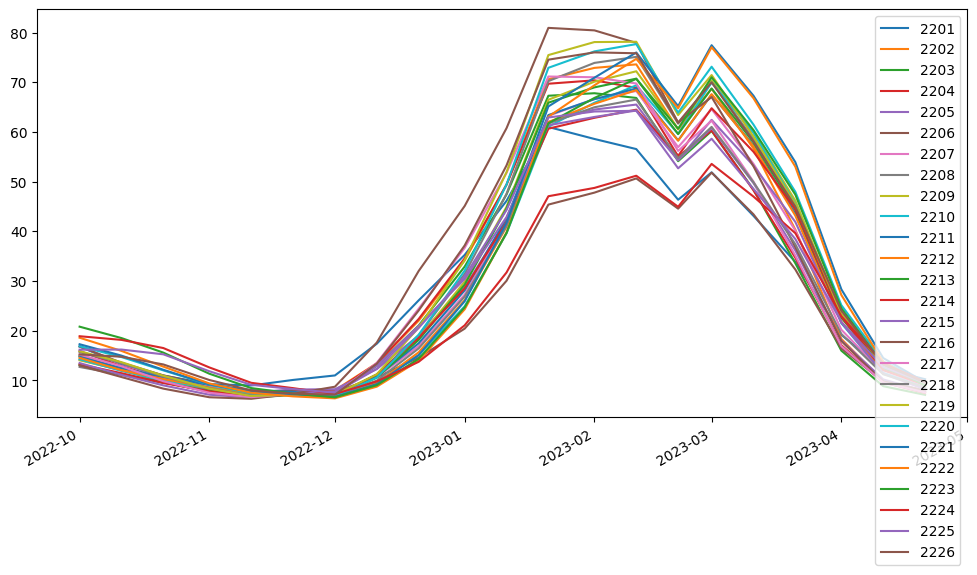

In [ ]:
# Plot the dataframe
df2.plot(figsize = (12,6))

In [ ]:
# save the dataframe and download to local folder
file_name3 = f'decadal_AETI_timeseries_for_{farm_name}_field.csv'
df2.to_csv(file_name3)

#download the two csv files
files.download(file_name3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # if you want to delete a folder use the code below.
# !rm -rf /content/L3-AETI-D
# !rm -rf /content/tifs
# !rm -rf /content/L3-AETI-D.zip